In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# Importing data set
df = pd.read_csv('data_s.csv')

In [3]:
def data_information(data):
    print("Data shape  number_rows/number_columns{}".format(data.shape))
    print()
    print()
    print("Featurs in data sets are:\n{}".format(data.columns))
    print()
    print()
    print("Statistic view on data \n{}".format(data.describe()))
    print()
    print("Head of data set\n{}".format(data.head(5)))
    print()
    print("Tail of data set\n{}".format(data.tail(5)))
    print()
    print()
    print("Nan values in data set\n{}".format(data.isnull().sum()))

In [4]:
data_information(df)

Data shape  number_rows/number_columns(1000, 8)


Featurs in data sets are:
Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')


Statistic view on data 
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000

Head of data set
   gender race/ethnicity parental level of education         lunch  \
0  female        group B           bachelor's degree      standard   
1  female        group C                some college      standard   
2  female        group B             master's degre

In [5]:
#df_num is sub set of dataframe that consists only numeric values
def numeric_data(data):
    df_num =data.select_dtypes(include=["int64","float64"])
    return df_num

In [6]:
# function corelation matrix(argument is data_set)
def corr_matrix(data):
    df_num=data.select_dtypes(include=["int64","float64"])
    corr_matrix_origin = df_num.corr(method ='pearson')
    list_col_origin = list(df_num.columns)
    plt.figure(figsize = (15,5))
    ax = sns.heatmap(corr_matrix_origin, annot=True,
                 yticklabels=list_col_origin,
                 xticklabels=list_col_origin,
                 annot_kws={'size': 15},
                linecolor='black', center=False,  linewidths=.5)

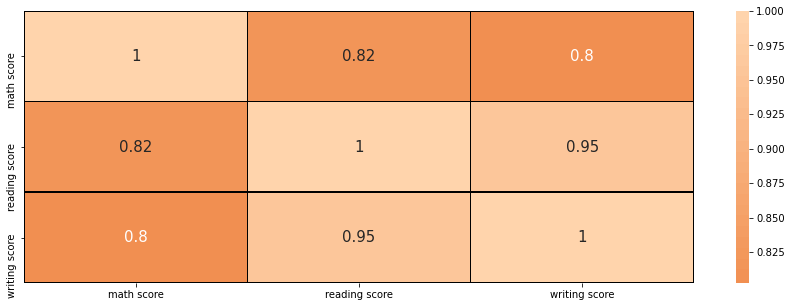

In [7]:
corr_matrix(df)

In [8]:
def numeric_feature_list(data):
    numeric_list=list(numeric_data(data).columns)
    return numeric_list
print(len(numeric_feature_list(df)))


3


In [9]:
#function distribution_histogram (arguments are list on numeric columns,number of row,nomer of columns
#figure size x,figuresize_Y,dataframe )
#functons should plot histograms for all numeric values in dataset, in number matric shape(nrow x ncolm we want)
def distribution_histogram(feature_list,n_row,n_col,f_size1,f_size2,data):
    fig,axs= plt.subplots(n_row,n_col,figsize=(f_size1,f_size2))
    for i in range(len(feature_list)):
        row=i//n_col
        col=i%n_col
        try:
            ax=axs[row,col]
            x=data[feature_list[i]]
            plot=sns.distplot(x,ax=ax)
        except(IndexError):
            pass

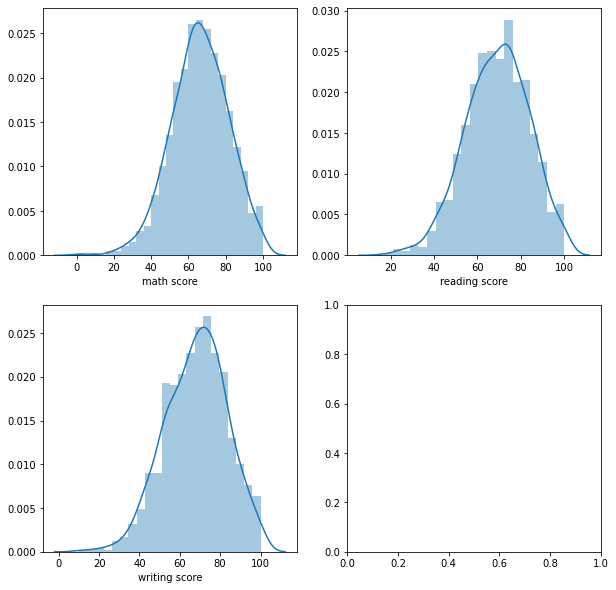

In [10]:
#call of distribution function that plot histograms for all numeric data
#first argument is list of numeric feature ( we make it by function numeric_feature_list)

distribution_histogram(numeric_feature_list(df),2,2,10,10,numeric_data(df))

In [11]:
def distribution_boxplot(feature_list,n_row,n_col,f_size1,f_size2,data):
    fig,axs= plt.subplots(n_row,n_col,figsize=(f_size1,f_size2))
    for i in range(len(feature_list)):
        row=i//n_col
        col=i%n_col
        try:
            ax=axs[row,col]
            x=data[feature_list[i]]
            plot=sns.boxplot(x,ax=ax)
        except(IndexError):
            pass

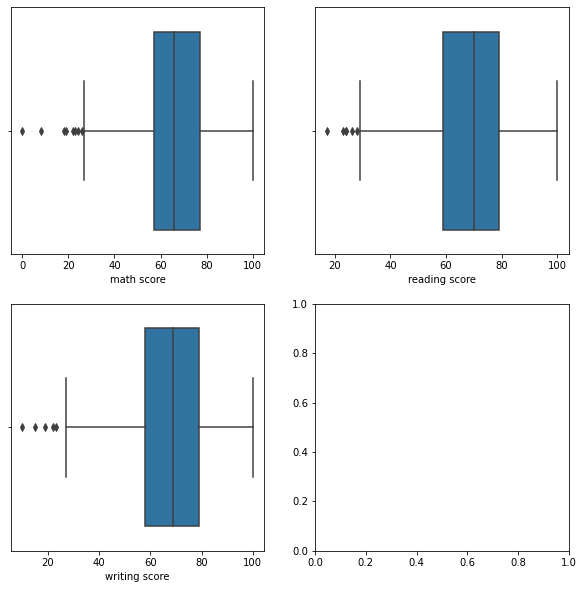

In [12]:
# #distribution_histogram(num_cols,2,2,10,10,df_num)
distribution_boxplot(numeric_feature_list(df),2,2,10,10,numeric_data(df))

In [13]:
def count_values(x_value,data_frame,rotation):
    fig=plt.gcf()
    fig.set_size_inches(30,10)
    plot = sns.countplot(x =x_value, data=data_frame)
    plot.set_xticklabels(plot.get_xticklabels(), rotation=rotation)
    
    
    
    

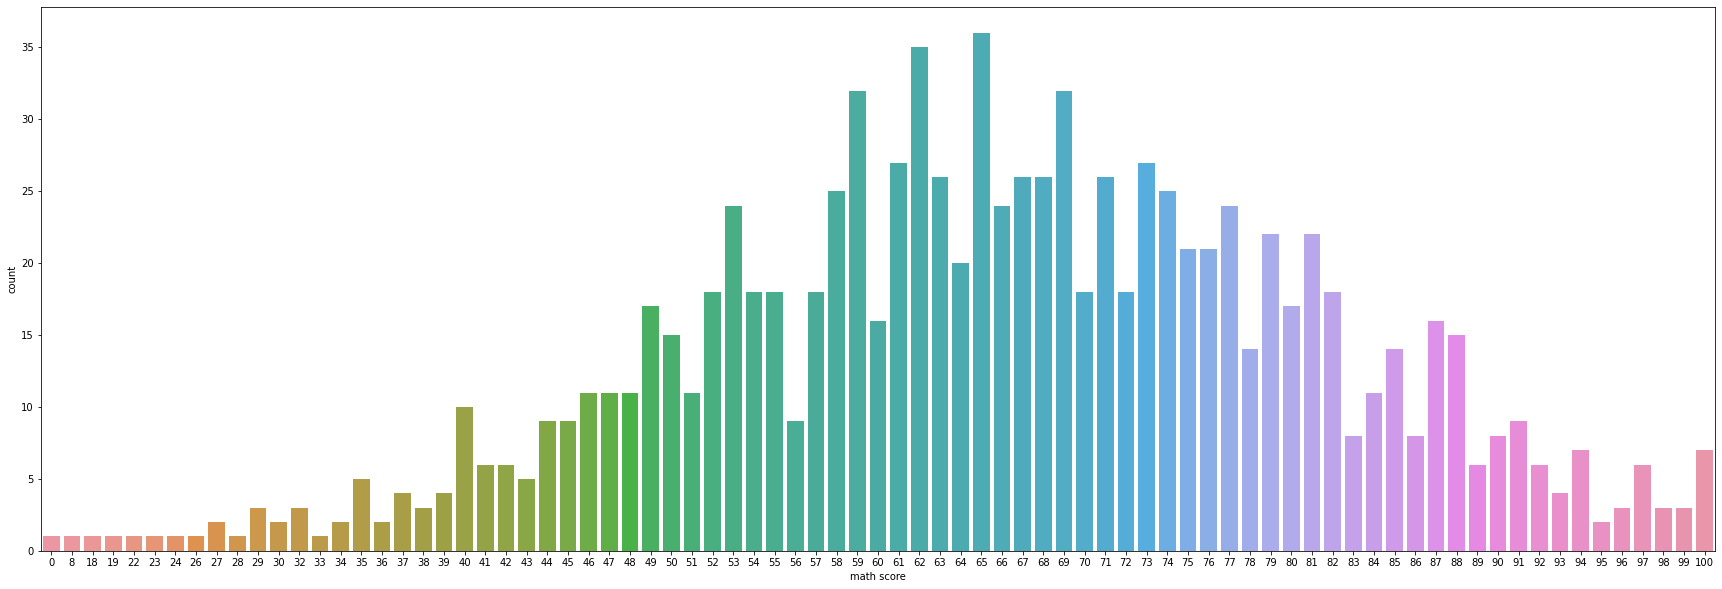

In [14]:
#count number of fire according to the month
count_values("math score",df,0)

In [15]:
#dependans of damage aeria according to the firecarasteristic
def dependant_feature_to_undependant(nrow,ncols,figsize1,figsize2,data_set,dependant_feature):
    list_value=numeric_feature_list(data_set)
    list_value.remove(dependant_feature)
    fig, axs = plt.subplots(nrows =nrow,ncols =ncols, figsize = (figsize1,figsize2))
    for i in range(0, len(list_value)):
        try:
            rows =i //ncols
            cols =i % ncols
            ax = axs[rows,cols]
            plot = sns.regplot(x = list_value[i], y = dependant_feature, data =data_set, ax=ax)
        except:
            pass

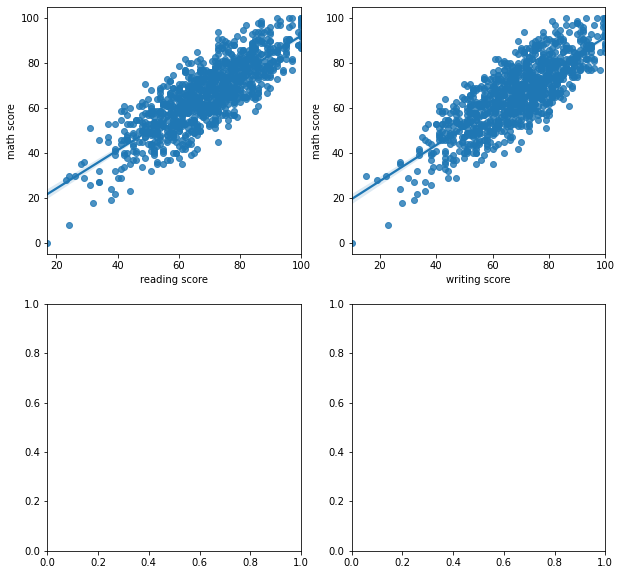

In [16]:
# dependans according to whole dataset
dependant_feature_to_undependant(2,2,10,10,df,"math score")

In [17]:
def distribution_boxplot(feature_list,n_row,n_col,f_size1,f_size2,data,dependant_value,hue):
    List_indipendant=feature_list
    List_indipendant.remove(dependant_value)
    fig,axs= plt.subplots(n_row,n_col,figsize=(f_size1,f_size2))
    for i in range(len(List_indipendant)):
        row=i//n_col
        col=i%n_col
        try:
            ax=axs[row,col]
            x=data[List_indipendant[i]]
            y=dependant_value
            plot=sns.boxplot(x, y , hue = hue, data = data,ax=ax)
        except(IndexError):
            pass

In [18]:
def distribution_scatterplot(feature_list,n_row,n_col,f_size1,f_size2,data,dependant_value,hue):
    List_indipendant=feature_list
    List_indipendant.remove(dependant_value)
    fig,axs= plt.subplots(n_row,n_col,figsize=(f_size1,f_size2))
    for i in range(len(List_indipendant)):
        row=i//n_col
        col=i%n_col
        try:
            ax=axs[row,col]
            x=data[List_indipendant[i]]
            y=dependant_value
            plot=sns.scatterplot(x, y , hue = hue, data = data,ax=ax,color="purple")
        except(IndexError):
            pass

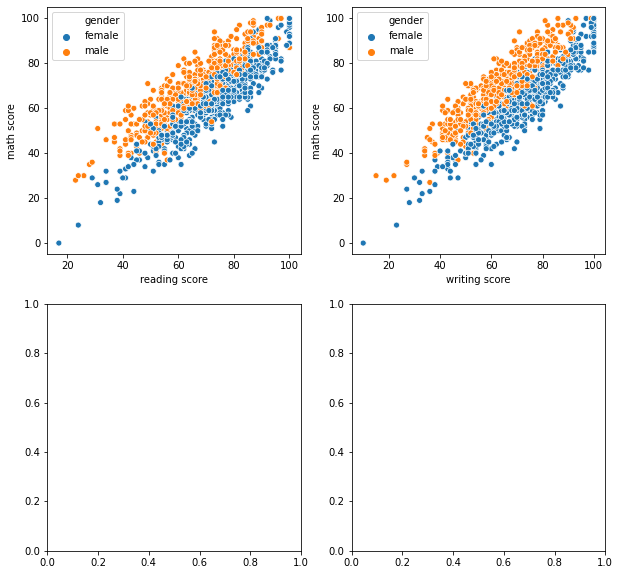

In [19]:
distribution_scatterplot(numeric_feature_list(df),2,2,10,10,df,"math score","gender")

In [20]:
# First we will use LaberEncoder for nominal features with only to possible values
def label_Encoder(data,feature):
    from sklearn.preprocessing import LabelEncoder
    lab_enc = LabelEncoder()
    data['gen_lab'] = lab_enc.fit_transform(data[feature].values)
 



In [21]:
df

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [22]:
def one_hot_encoder(feature_name):
    from sklearn.preprocessing import OneHotEncoder
    ohe = OneHotEncoder()
    ohe.fit(df.loc[:,[feature_name]])
    df_enc = pd.DataFrame(ohe.transform(df.loc[:, [feature_name]]).toarray(), columns=ohe.get_feature_names())
    return df_enc

In [23]:
df1_enc=one_hot_encoder('race/ethnicity')
df2_enc=one_hot_encoder('parental level of education')

In [24]:
# Concatenation of data_set with new df_frames after one_hote_encoder
# if we have more feature to encode in list functon put all new datasets devided by coma
df_transform = pd.concat([df,df1_enc,df2_enc], axis=1)
df_transform.head(5)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,x0_group A,x0_group B,x0_group C,x0_group D,x0_group E,x0_associate's degree,x0_bachelor's degree,x0_high school,x0_master's degree,x0_some college,x0_some high school
0,female,group B,bachelor's degree,standard,none,72,72,74,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,female,group C,some college,standard,completed,69,90,88,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,female,group B,master's degree,standard,none,90,95,93,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,male,group C,some college,standard,none,76,78,75,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [25]:
def drop_categorical_feature(data,features_list):
    df_modeling=data.drop(features_list, axis=1)
    return df_modeling

# Split dataset on train and test

In [26]:
def split_data_set(data,dependant_feature,list_to_remove_X_test,test_size):
    from sklearn.model_selection import train_test_split
    y=data[dependant_feature]
    X=data.drop(list_to_remove_X_test,axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=0)
    df_norm = pd.DataFrame(data = X_train, columns =X_train.columns)
    return X_train,X_test,y_train,y_test,df_norm

In [27]:
X_train,X_test,y_train,y_test,df_norm=split_data_set(df_transform,"math score",["gender","race/ethnicity","lunch","parental level of education","test preparation course"],30)
df_norm.head()

,math score,reading score,writing score,x0_group A,x0_group B,x0_group C,x0_group D,x0_group E,x0_associate's degree,x0_bachelor's degree,x0_high school,x0_master's degree,x0_some college,x0_some high school
823,71,87,82,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
710,93,84,90,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
614,82,93,93,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
790,48,62,60,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
408,52,57,56,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [28]:
print("X_train shape:{}\n y_train shape:{}\n X_test shape:{}\n y_test shape:{}".format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))


X_train shape:(970, 14)
 y_train shape:(970,)
 X_test shape:(30, 14)
 y_test shape:(30,)


In [29]:
# Function for normalization of data in data set
def normalisation(X_train,X_test):
    from sklearn.preprocessing import MinMaxScaler
    norm = MinMaxScaler()
    X_train_norm = norm.fit_transform(X_train)
    X_test_norm = norm.transform(X_test)
    return X_train_norm,X_test_norm

In [30]:
X_train_norm,X_test_norm=normalisation(X_train,X_test)

C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for 

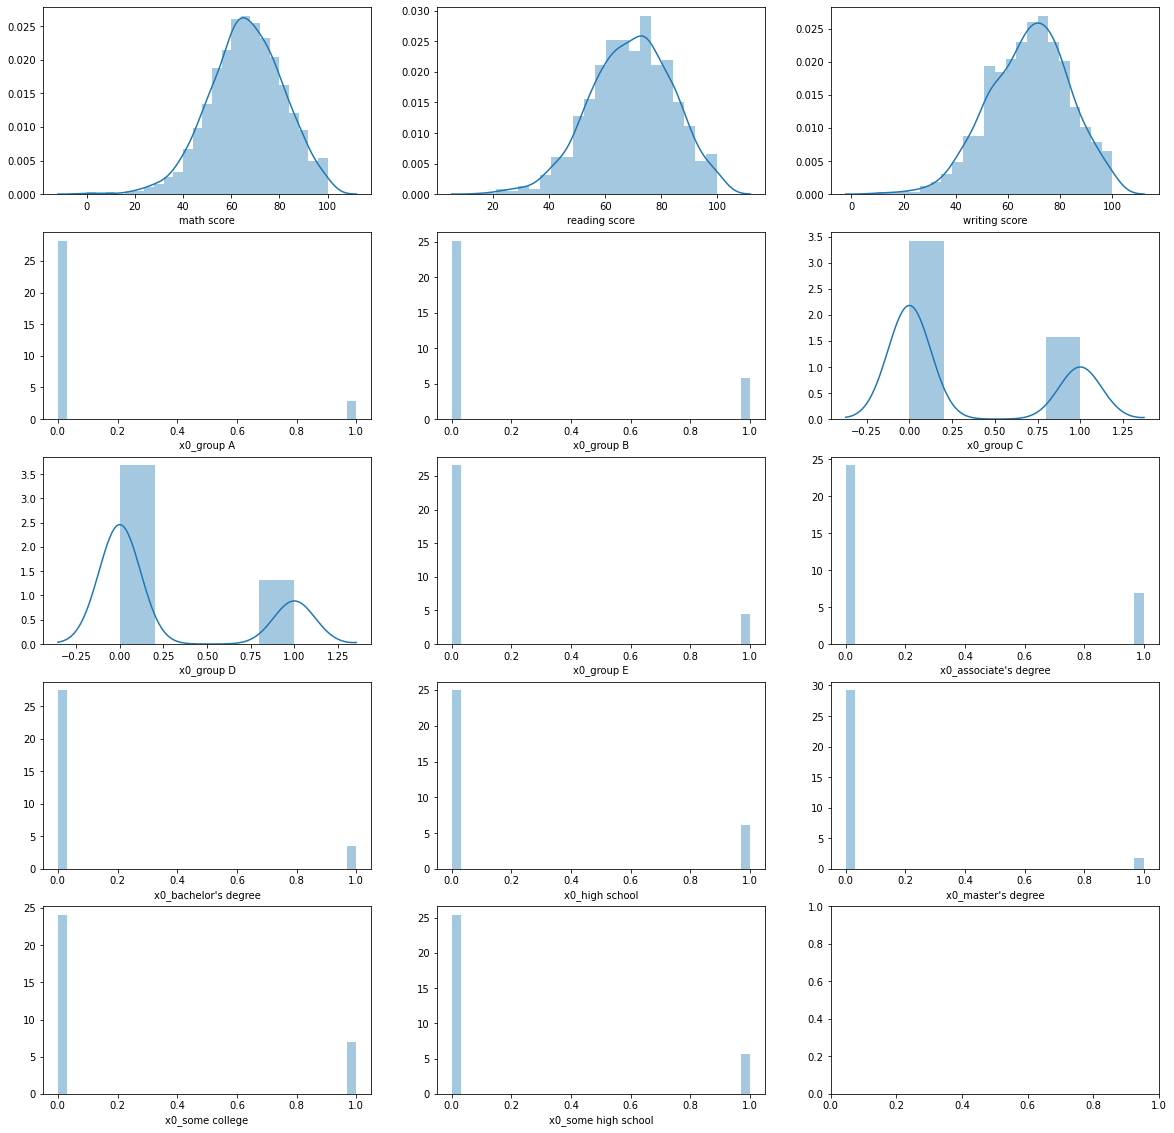

In [31]:
## plot normalized data
distribution_histogram(list(X_train.columns),5,3,20,20,df_norm)

In [32]:
# Function to standardize data 
def standardisation(X_train):
    from sklearn.preprocessing import StandardScaler
    stdsc = StandardScaler()
    X_train_std = stdsc.fit_transform(X_train)
    X_test_std = stdsc.transform(X_test)
    df_std = pd.DataFrame(data = X_train_std, columns = X_train.columns)
    return X_train_std,X_test_std,df_std

In [33]:
X_train_std,X_test_std,df_std=standardisation(X_train)

In [34]:
print("X_train shape:{}\n y_train shape:{}\n X_test shape:{}\n y_test shape:{}".format(X_train.shape,y_train.shape,X_test.shape,y_test.shape))


X_train shape:(970, 14)
 y_train shape:(970,)
 X_test shape:(30, 14)
 y_test shape:(30,)


C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)
C:\Users\PC\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for 

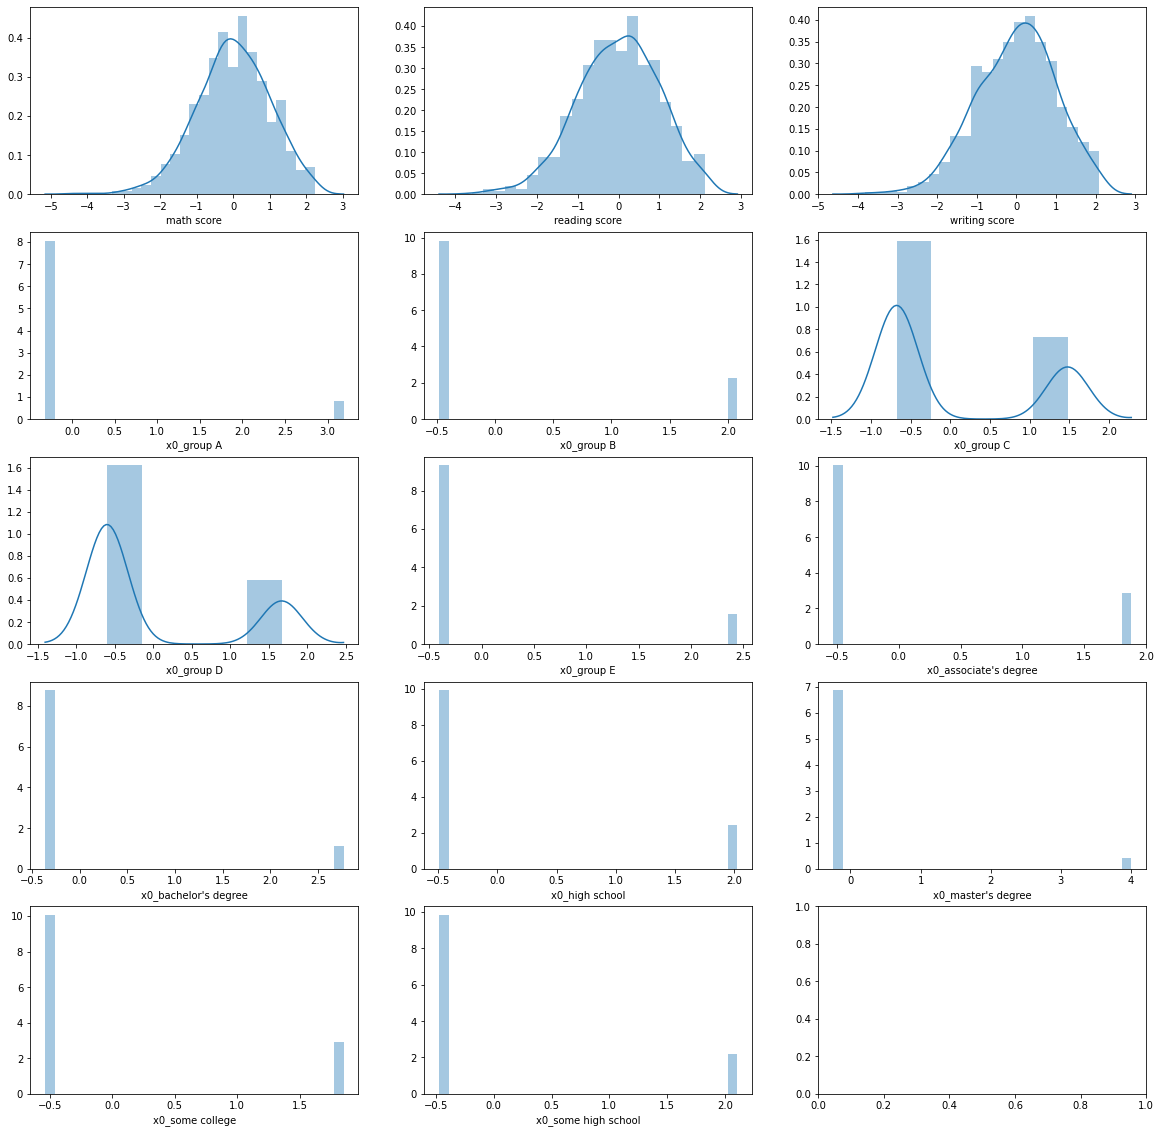

In [35]:
#plot standardized data
distribution_histogram(list(X_train.columns),5,3,20,20,df_std)

In [36]:
# import mean absolute and squared error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

# Create dict acc_scores to see which model is the best
mean_sq_err_std = {}
mean_abs_err_std = {}
lista_modela=[]

# Import models that will be applied on dataset

#1.model LinearRegression
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
model_ime=lin_reg
lista_modela.append(model_ime)

#2.model SVC kernel linear
from sklearn.svm import SVR, LinearSVR
svr_linear = SVR(kernel='linear', C=1)
model_ime=svr_linear
lista_modela.append(model_ime)

#3.model SVR_rbf
SVR_rbf=SVR()
model_ime=SVR_rbf
lista_modela.append(model_ime)

#4.model RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
ran_for_reg = RandomForestRegressor()
model_ime=ran_for_reg
lista_modela.append(model_ime)

#5.model DecisionTreeRegressor
from sklearn.tree import DecisionTreeRegressor
dec_tree_reg = DecisionTreeRegressor()
model_ime=dec_tree_reg
lista_modela.append(model_ime)

#6.model ExtraTreeRegressor
from sklearn.tree import ExtraTreeRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
model_ime=extra_tree
lista_modela.append(model_ime)

#7.model BaggingRegressor
from sklearn.ensemble import BaggingRegressor
extra_tree = ExtraTreeRegressor(random_state=0)
bag_tree = BaggingRegressor(extra_tree, random_state=0)
model_ime=bag_tree
lista_modela.append(model_ime)

#8.model KNeighborsRegressor
from sklearn.neighbors import KNeighborsRegressor
n_neighbor=KNeighborsRegressor()
model_ime=n_neighbor
lista_modela.append(model_ime)

#9.model Ridge
from sklearn.linear_model import Ridge
ridge=Ridge()
model_ime=ridge
lista_modela.append(model_ime)

#10.model Lasso
from sklearn.linear_model import Lasso
lasso=Lasso()
model_ime=lasso
lista_modela.append(model_ime)



In [37]:
#fuction model acespts arguments( model,X_train_std,y_train,X_test_std,y_test)
def model(model_ime,X_tr=X_train_std,y_tr=y_train,X_test_s=X_test_std,y_tst=y_test):
    #making model
    model_n=model_ime.fit(X_train_std,y_train)
    y_pred=model_n.predict(X_test_std)
    #mean absolut error
    MAE=mean_absolute_error(y_test,y_pred)
    MSE=mean_squared_error(y_test,y_pred)
    #appending errors to dictionary
    mean_sq_err_std[model_ime]=MSE
    mean_abs_err_std[model_ime]=MAE
    return(model_n,MAE,MSE,y_pred)


In [38]:
def unique_list_model(lista_modela):
    model_unique=[]
    for model in lista_modela:
        if model not in model_unique:
            model_unique.append(model)
    return(model_unique)

In [39]:
lista_mod=unique_list_model(lista_modela)
print(lista_mod)



[LinearRegression(), SVR(C=1, kernel='linear'), SVR(), RandomForestRegressor(), DecisionTreeRegressor(), ExtraTreeRegressor(random_state=0), BaggingRegressor(base_estimator=ExtraTreeRegressor(random_state=0),
                 random_state=0), KNeighborsRegressor(), Ridge(), Lasso()]


In [40]:
for mod in lista_mod:
    model(mod)

In [41]:
#Results of models 
df_ERROR = pd.DataFrame({'models': [1,2,3,4,5,6,7,8,9,19],'MAE': list(mean_abs_err_std.values()),"MSE":list(mean_sq_err_std.values())})
df_ERROR

,models,MAE,MSE
0,1,1.231607e-14,2.457039e-28
1,2,4.497349e-02,2.723295e-03
2,3,2.770470e+00,1.522565e+01
3,4,3.133333e-02,2.228000e-02
4,5,3.333333e-02,3.333333e-02
5,6,3.333333e-02,3.333333e-02
6,7,1.700000e-01,3.390000e-01
7,8,2.973333e+00,1.197333e+01
8,9,2.883643e-02,1.112850e-03
9,19,8.467239e-01,1.067430e+00


In [42]:
#Reslut of estimation of Mean squared error
lista_value_MSE=list(mean_sq_err_std.values())
Min_MSE=min(list(mean_sq_err_std.values()))
i=lista_value_MSE.index(Min_MSE)
print(f"Minimum of mean apsolute error is for model {lista_mod[i]},and value of MSE is {Min_MSE}")

Minimum of mean apsolute error is for model LinearRegression(),and value of MSE is 2.457038766128378e-28


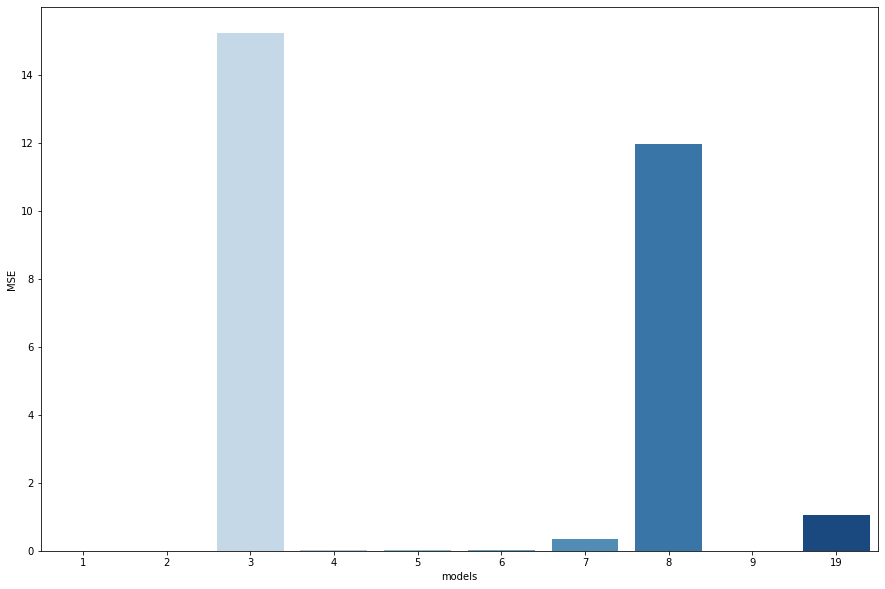

In [43]:
fig = plt.gcf()
fig.set_size_inches(15,10)
ax =sns.barplot(x="models",y="MSE",palette="Blues",data=df_ERROR,ci=None)

In [44]:
#Reslut of estimation of Mean squared error
lista_value_MAE=list(mean_abs_err_std.values())
Min_MAE=min(list(mean_abs_err_std.values()))
i=lista_value_MAE.index(Min_MAE)
print(f"Minimum of mean apsolute error is for model {lista_mod[i]},and value of MSE is {Min_MAE}")

Minimum of mean apsolute error is for model LinearRegression(),and value of MSE is 1.2316074086508404e-14


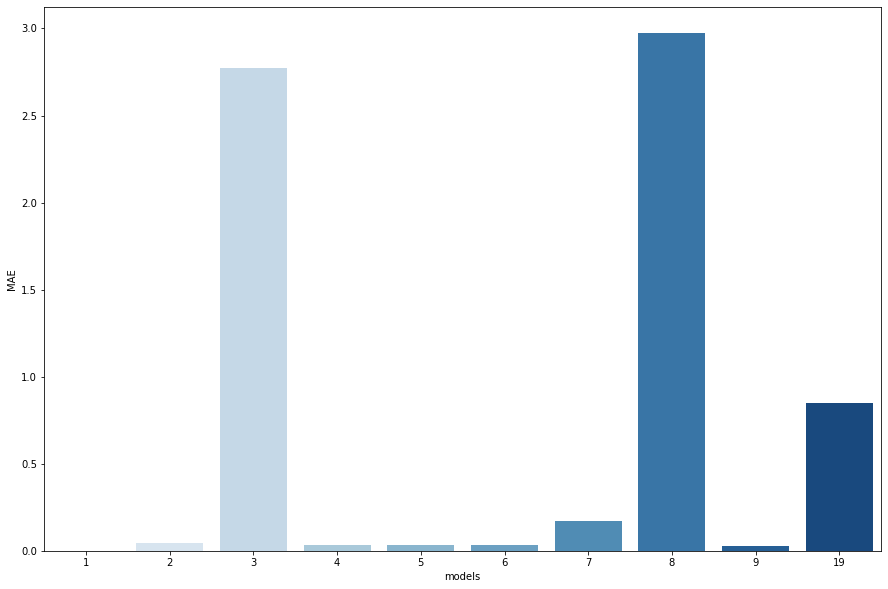

In [45]:
fig = plt.gcf()
fig.set_size_inches(15,10)
ax =sns.barplot(x="models",y="MAE",palette="Blues",data=df_ERROR,ci=None)
